<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#La-régression-linéaire" data-toc-modified-id="La-régression-linéaire-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>La régression linéaire</a></span><ul class="toc-item"><li><span><a href="#Les-équations-normales" data-toc-modified-id="Les-équations-normales-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Les équations normales</a></span></li><li><span><a href="#Régression-Linéaire" data-toc-modified-id="Régression-Linéaire-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Régression Linéaire</a></span></li></ul></li><li><span><a href="#Choix-de-la-métrique-de-performance" data-toc-modified-id="Choix-de-la-métrique-de-performance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Choix de la métrique de performance</a></span><ul class="toc-item"><li><span><a href="#Mean-absolute-error" data-toc-modified-id="Mean-absolute-error-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mean absolute error</a></span></li><li><span><a href="#Mean-squared-error" data-toc-modified-id="Mean-squared-error-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mean squared error</a></span></li><li><span><a href="#Mean-squared-logarithmic-error" data-toc-modified-id="Mean-squared-logarithmic-error-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mean squared logarithmic error</a></span></li><li><span><a href="#Median-absolute-error" data-toc-modified-id="Median-absolute-error-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Median absolute error</a></span></li><li><span><a href="#$R^{2}$-score,-the-coefficient-of-determination" data-toc-modified-id="$R^{2}$-score,-the-coefficient-of-determination-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>$R^{2}$ score, the coefficient of determination</a></span></li></ul></li><li><span><a href="#La-descente-de-gradient" data-toc-modified-id="La-descente-de-gradient-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>La descente de gradient</a></span><ul class="toc-item"><li><span><a href="#Descente-de-gradient-stochastique" data-toc-modified-id="Descente-de-gradient-stochastique-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descente de gradient stochastique</a></span></li></ul></li></ul></div>

# La régression linéaire

In [25]:
import time
import os
import warnings

import pandas as pd, seaborn as sns, numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
warnings.filterwarnings(action="ignore")
sns.set(font_scale=3)
np.random.seed(1234)

In [26]:
taille_echantillon = 100
X = 2 * np.random.rand(taille_echantillon, 1)
y = 4 + 3 * X + np.random.randn(taille_echantillon, 1)

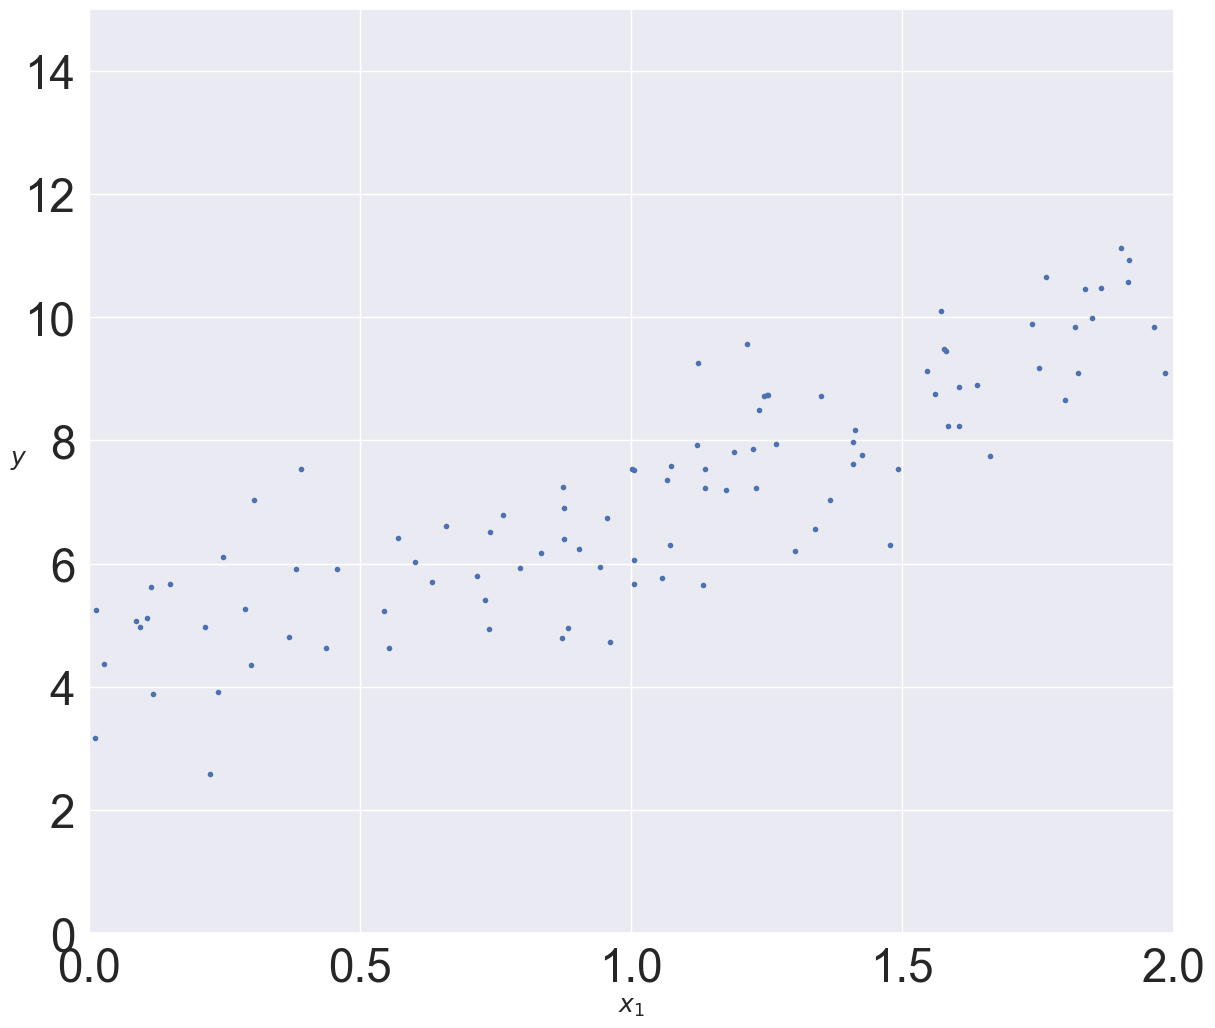

In [27]:
plt.figure(figsize=(14,12))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [28]:
y.shape

(100, 1)

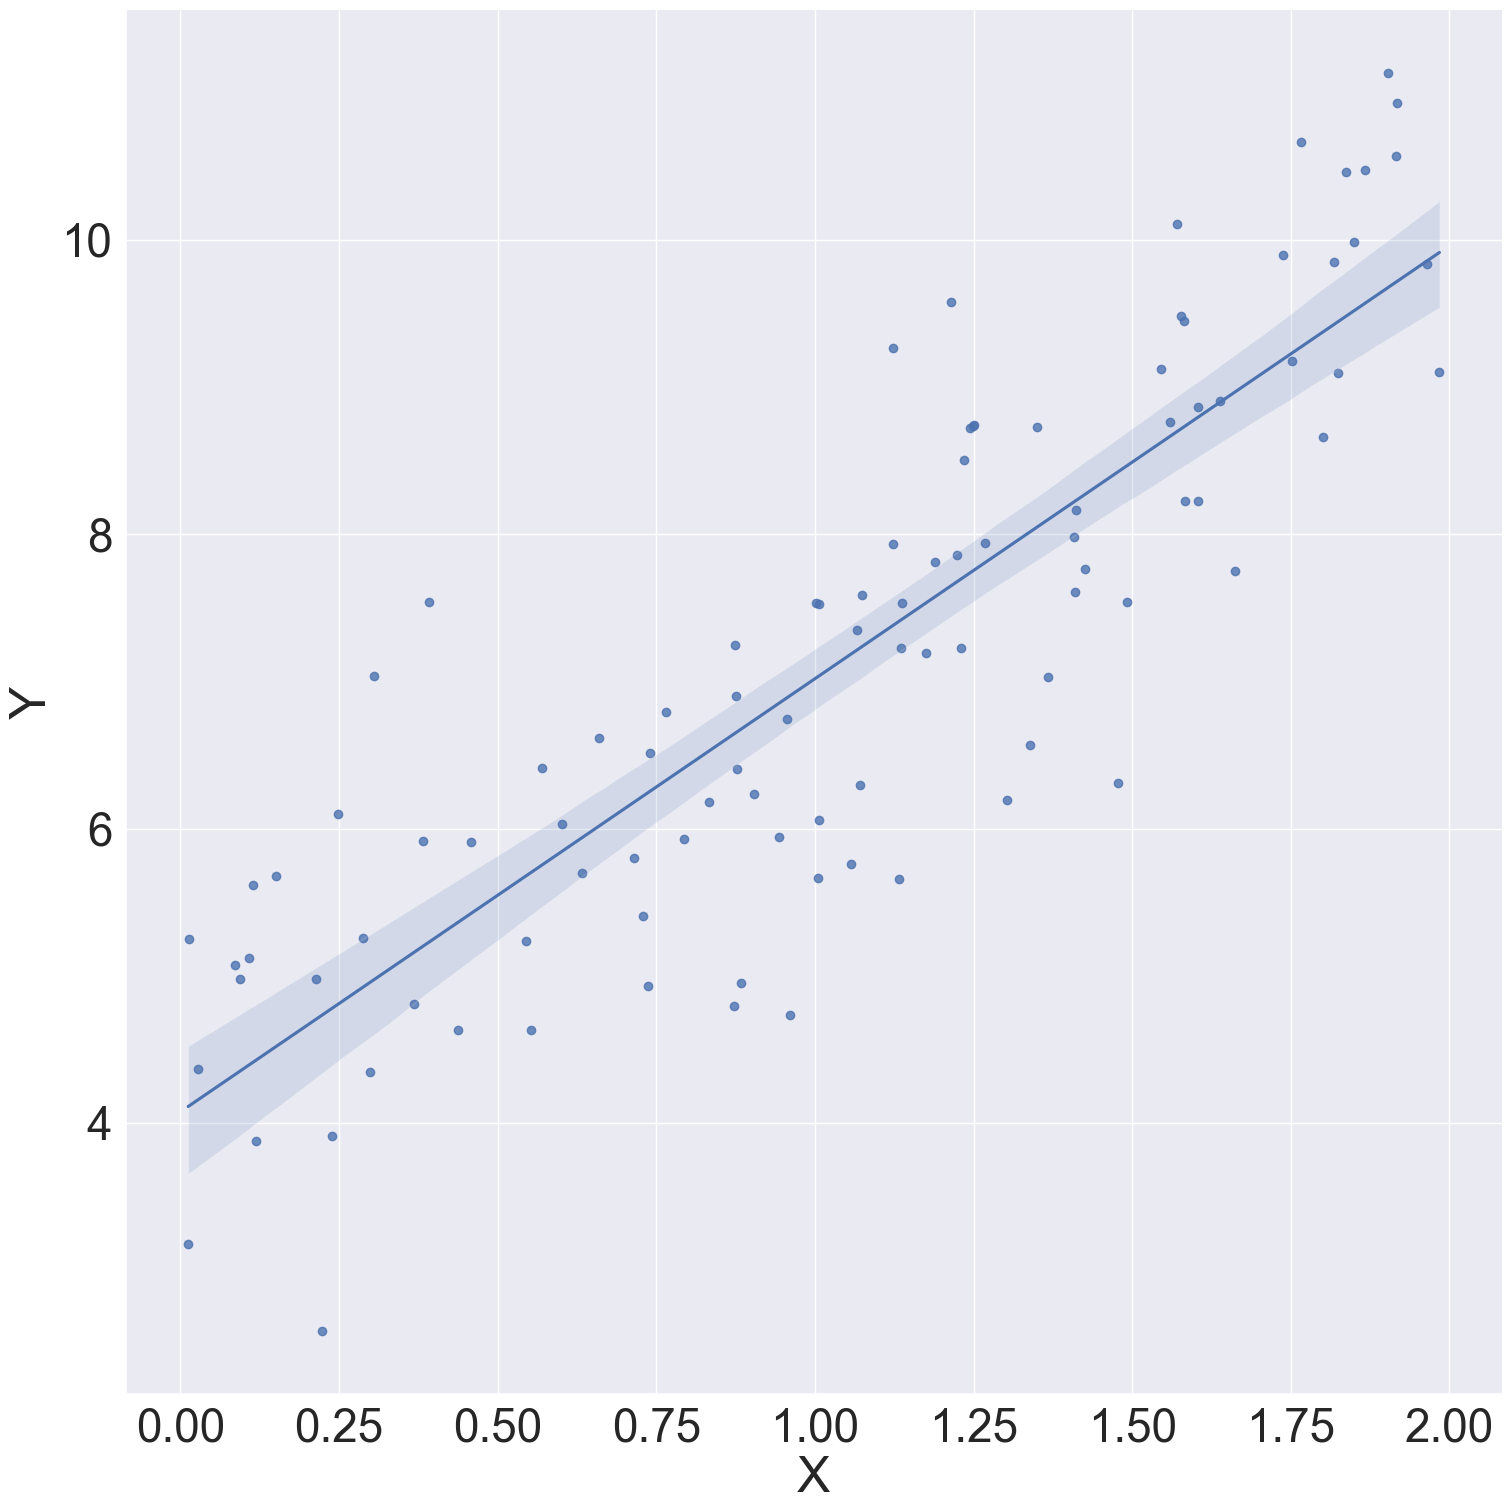

In [29]:
import seaborn as sns
sns.lmplot(x="X", y="Y", data=pd.DataFrame({'X':X[:,0],'Y':y[:,0]}), height =16)

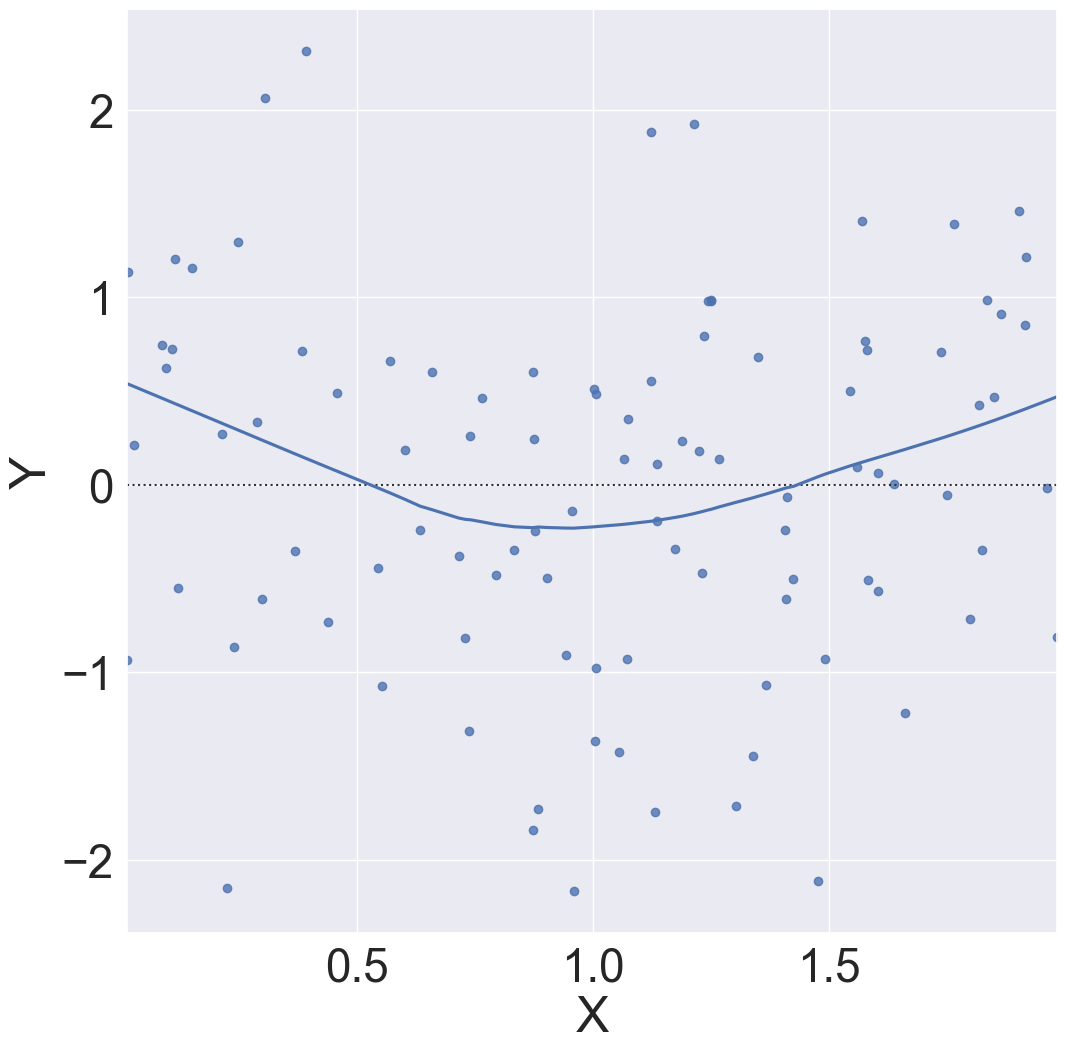

In [30]:
plt.figure(figsize=(12,12))
sns.residplot(x="X", y="Y", data=pd.DataFrame({'X':X[:,0],'Y':y[:,0]}), lowess=True);

Le but de la régression linéaire est de trouver une fonction linéaire $f: \mathbb{R}^{p} \rightarrow \mathbb{R}$ qui permette de prédire l'étiquette $y^{(i)}$ du i-ème point à partir du vecteur  $x^{(i)}$.

$f(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_p x_p$

Comment trouver les valeurs des coefficients $\theta_0,\theta_1,\theta_2, \dots ,\theta_p x_p$

Calculons maintenant $\theta$ à l’aide de l’équation normale. Nous allons utiliser la fonction **inv()** du module d’algèbre linéaire **np.linalg** de **NumPy** pour l’inversion de matrice, et la méthode **dot()** pour les produits matriciels


## Les équations normales 

$\theta = {( X^T X )}^{-1} X^T y $


In [31]:
t0 = time.time()        
X_b = np.c_[np.ones((taille_echantillon, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
t1 = time.time()        
print('Exécution  :'+('%.5fs' % (t1 - t0)).lstrip('0'))

Exécution  :.00100s


In [32]:
t0 = time.time()        
X_b = np.c_[np.ones((taille_echantillon, 1)), X]  # add x0 = 1 to each instance
theta_best = (np.linalg.inv(X_b.T @ X_b) @ X_b.T) @ y 
t1 = time.time()        
print('Exécution  :'+('%.5fs' % (t1 - t0)).lstrip('0'))

Exécution  :.00000s


In [33]:
theta_best

array([[4.07630632],
       [2.94132381]])

Maintenant nous pouvons faire des prédictions à l’aide de $\theta$

In [34]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07630632],
       [9.95895394]])

In [35]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.07630632],
       [9.95895394]])

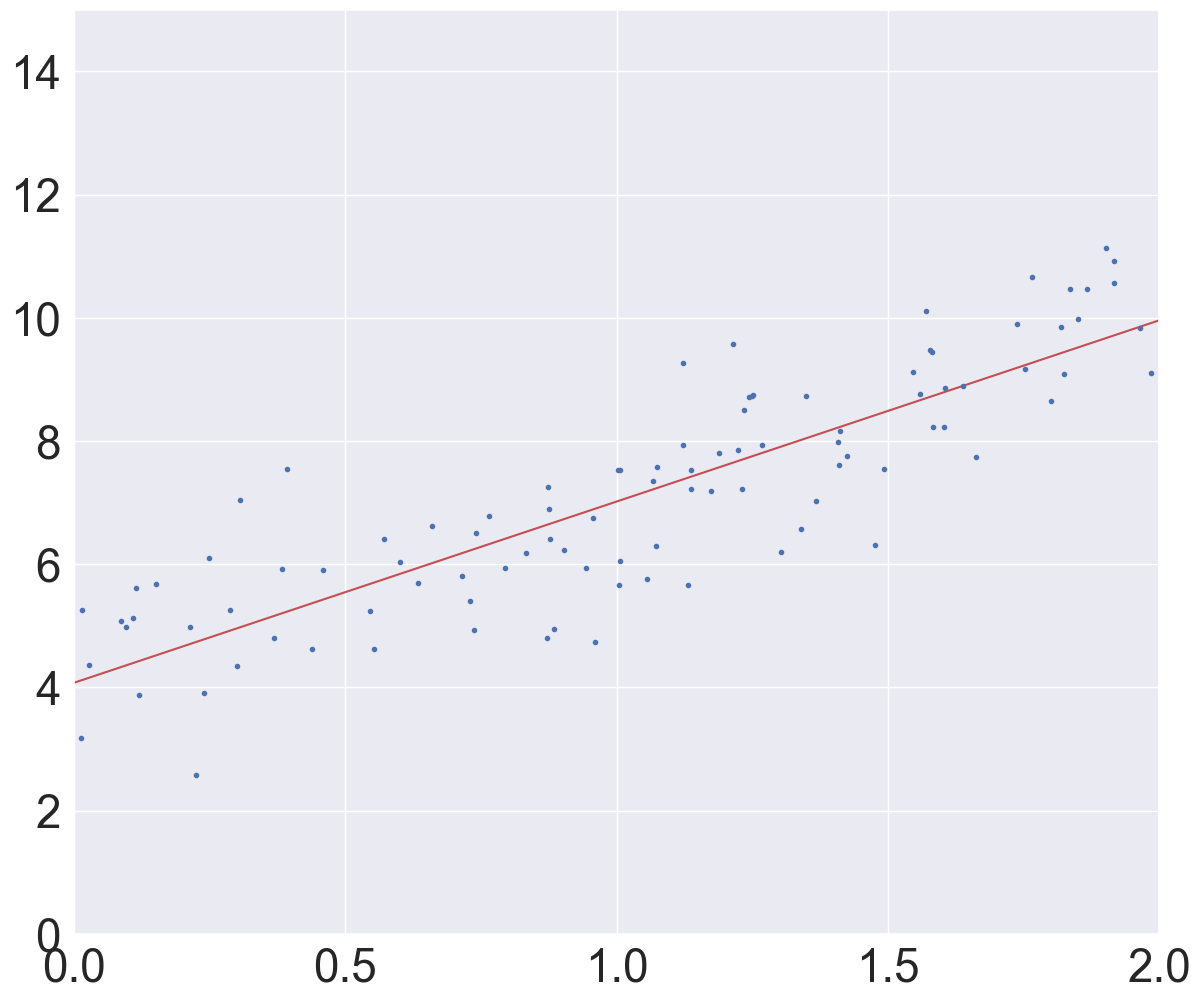

In [36]:
plt.figure(figsize=(14,12))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [37]:
X_new = np.array([[0],[0.5],[1],[1.5], [2]])
X_new_b = np.c_[np.ones((5, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07630632],
       [5.54696823],
       [7.01763013],
       [8.48829204],
       [9.95895394]])

In [38]:
X_new = np.array([[0],[0.5],[1],[1.5], [2]])
X_new_b = np.c_[np.ones((5, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.07630632],
       [5.54696823],
       [7.01763013],
       [8.48829204],
       [9.95895394]])

In [39]:
y_new = 4 + 3 * X_new + np.random.randn(5, 1)

In [40]:
m = len(X_new)
cost = 1/(2*m) * ((y_predict - y_new).T @ (y_predict - y_new))
cost

array([[0.42747597]])

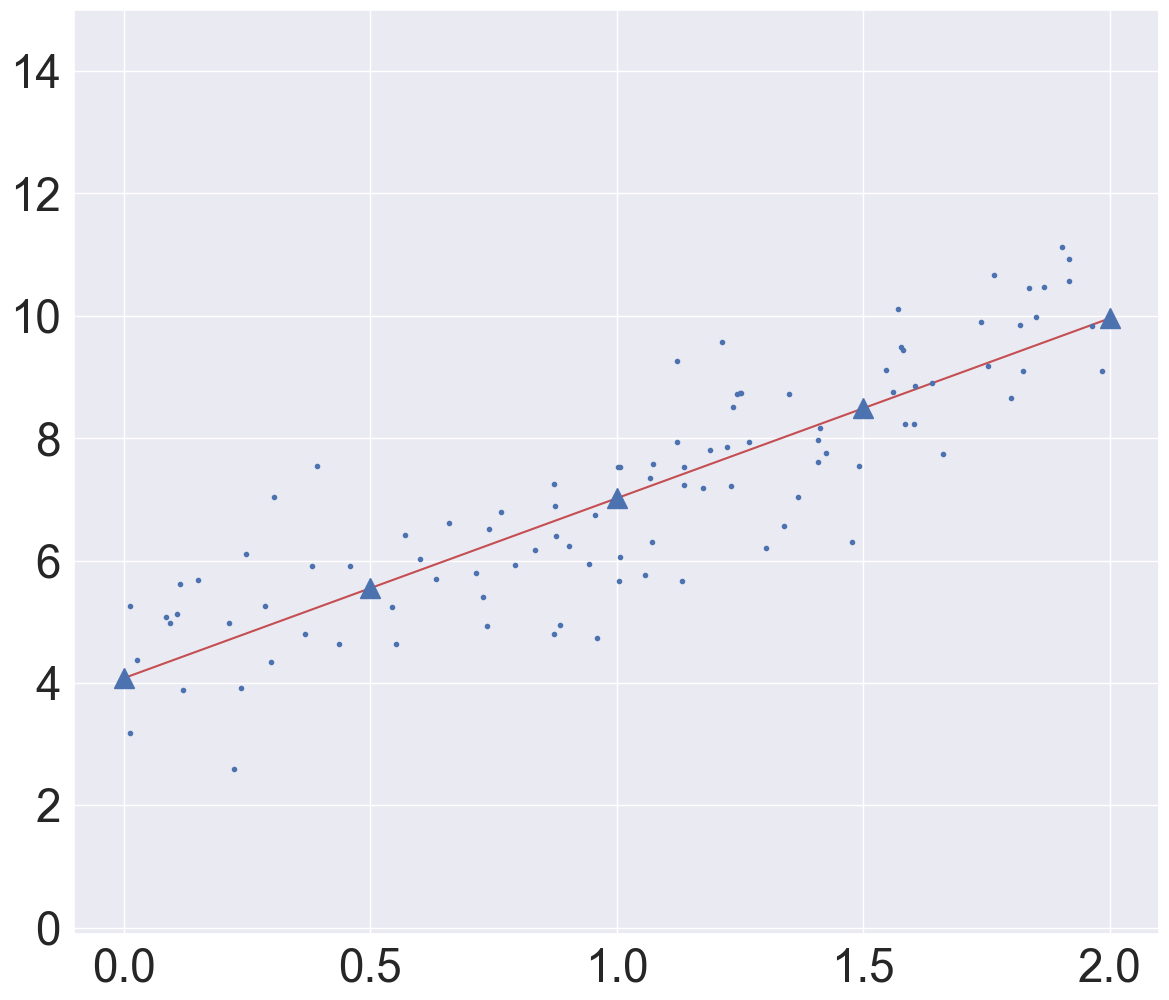

In [41]:
plt.figure(figsize=(14,12))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "b^", ms= 15)
plt.axis([-0.1, 2.1, -0.1, 15])
plt.show()

## Régression Linéaire

Voici le code équivalent lorsqu’on utilise **Scikit-Learn**

L’équation normale calcule l’inverse de $X^{T} ⋅ X$, qui est une matrice $(n + 1) × (n + 1)$ (où n est le nombre de variables). La complexité algorithmique d’une inversion de matrice de taille n × n se situe entre $O(n^{2,4})$ et $O(n^{3})$, selon l’algorithme d’inversion utilisé. Autrement dit, si vous doublez le nombre de variables, le temps de calcul est grosso modo multiplié par un facteur compris entre $2^{2,4} = 5,3$ et $2^{3} = 8$.

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07630632]), array([[2.94132381]]))

In [43]:
y_pred = lin_reg.predict(X_new)

# Choix de la métrique de performance
## Mean absolute error


In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, lin_reg.predict(X))

0.783977240164605

## Mean squared error
$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (f(x_i)-y_i)^2}$

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lin_reg.predict(X))

0.9272583695173341

## Mean squared logarithmic error

$RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(f(x_i)+1) - \log(y_i+1))^2}$

In [46]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y, lin_reg.predict(X))

0.017576195756205417

## Median absolute error

In [47]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y, lin_reg.predict(X))

0.6697992616400401

## $R^{2}$ score, the coefficient of determination

$RSE = \frac{\sum_{i=1}^n (y_i - f(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$ avec $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$  

$R = \frac{\sum_{i=1}^n (y_i - \bar y) (f(x_i) - \overline{f(x)})}{\sqrt{\sum_{i=1}^n (y_i - \bar y)^2} \sqrt{\sum_{i=1}^n (f(x_i) - \overline{f(x)})^2 }}$

In [48]:
from sklearn.metrics import r2_score
print(r2_score(y, lin_reg.predict(X)))
print(r2_score(y, lin_reg.predict(X), multioutput='variance_weighted'))
print(r2_score(y, lin_reg.predict(X), multioutput='uniform_average'))
print(r2_score(y, lin_reg.predict(X), multioutput='raw_values'))
print(np.sqrt(r2_score(y, lin_reg.predict(X))))

0.7407806151377188
0.7407806151377188
0.7407806151377188
[0.74078062]
0.8606861304434497


# La descente de gradient

In [49]:
def gradientDescent(X, y, theta, eta, n_iterations, costList, thetaList0, thetaList1):
    plt.figure(figsize=(14,12))
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
    m = len(X_b)
    plt.plot(X, y, "b.")
    for iteration in range(n_iterations):
        y_predict = X_b @ theta
        style = "b-" if iteration > 0 else "r--"
        style = "g-" if iteration == n_iterations - 1 else style
        plt.plot(X, y_predict, style)
            
        cost = 1/(2*m) * (((X_b @ theta) - y).T @ ((X_b @ theta) - y))
        costList.append(cost.ravel()[0])
        gradients = 2/m * (X_b.T @ ((X_b @ theta) - y))
        print(gradients)
        theta = theta - eta * gradients
        thetaList0.append(theta.ravel()[0])
        thetaList1.append(theta.ravel()[1])
    plt.xlabel("$x_1$", fontsize=18);
    plt.axis([0, 2, -1, 15]);
    plt.title(r"$\eta = {}$".format(eta), fontsize=16);
    
    
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    
    plt.plot(X, lin_reg.predict(X), "r-");

[[-14.2513053 ]
 [-16.57651051]]
[[-13.62257326]
 [-15.82314236]]
[[-13.0220366]
 [-15.1036201]]
[[-12.44842961]
 [-14.41642424]]
[[-11.90054343]
 [-13.76010347]]
[[-11.37722347]
 [-13.13327166]]
[[-10.87736697]
 [-12.53460491]]
[[-10.39992066]
 [-11.96283873]]
[[ -9.94387857]
 [-11.41676543]]
[[ -9.50827989]
 [-10.8952315 ]]


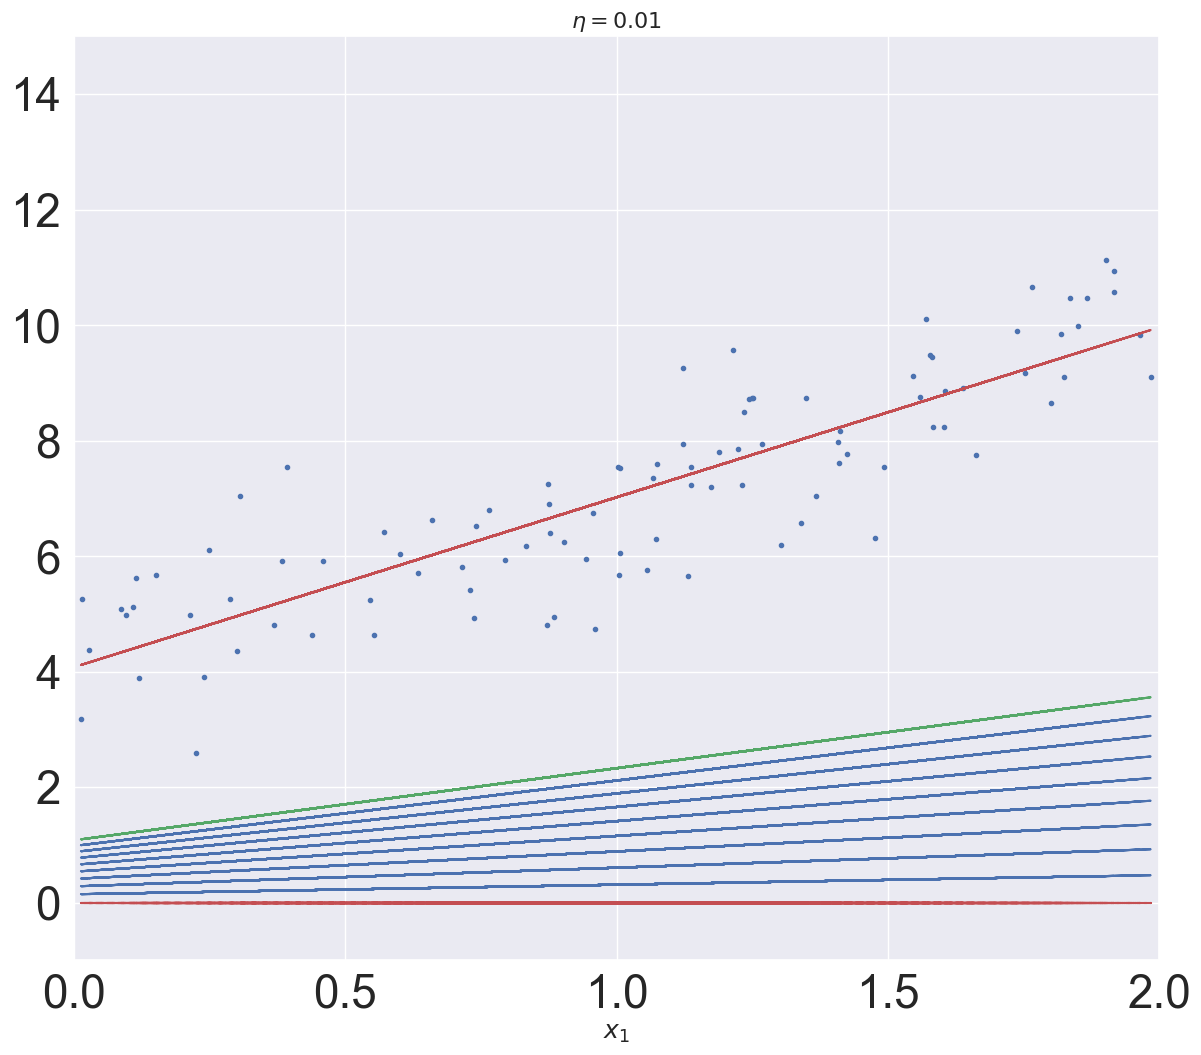

In [50]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = np.array([[0],[0]]), 
                eta = 0.01, n_iterations = 10, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1);

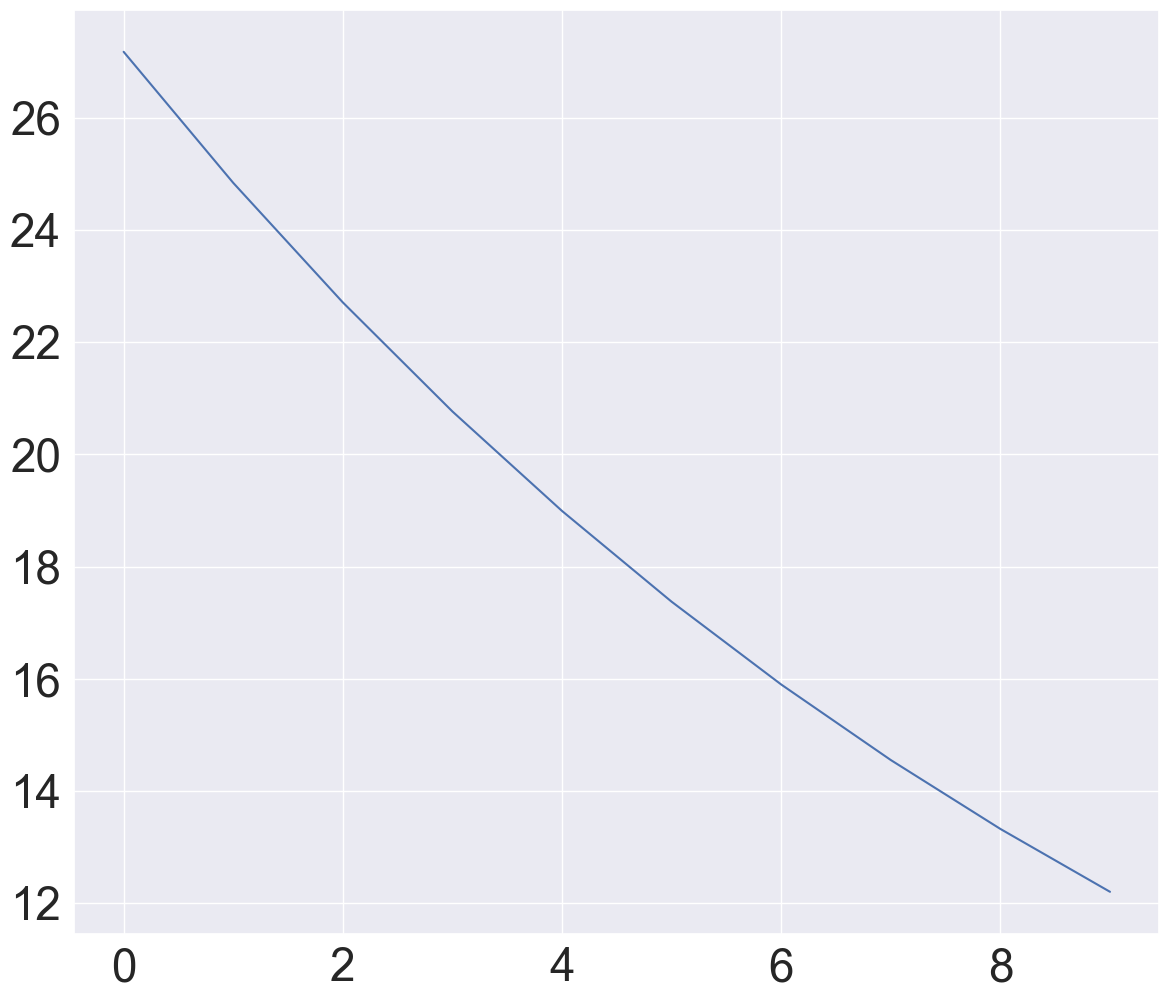

In [51]:
plt.figure(figsize=(14,12))
plt.plot(costList);

In [ ]:
plt.figure(figsize=(14,12))
plt.plot(thetaList0);

In [ ]:
plt.figure(figsize=(14,12))
plt.plot(thetaList1);

[[-14.2513053 ]
 [-16.57651051]]
[[-13.62257326]
 [-15.82314236]]
[[-13.0220366]
 [-15.1036201]]
[[-12.44842961]
 [-14.41642424]]
[[-11.90054343]
 [-13.76010347]]
[[-11.37722347]
 [-13.13327166]]
[[-10.87736697]
 [-12.53460491]]
[[-10.39992066]
 [-11.96283873]]
[[ -9.94387857]
 [-11.41676543]]
[[ -9.50827989]
 [-10.8952315 ]]
[[ -9.09220694]
 [-10.39713524]]
[[-8.69478323]
 [-9.92142441]]
[[-8.31517163]
 [-9.46709398]]
[[-7.95257258]
 [-9.03318408]]
[[-7.60622243]
 [-8.61877789]]
[[-7.27539179]
 [-8.22299978]]
[[-6.95938403]
 [-7.84501342]]
[[-6.65753379]
 [-7.48402001]]
[[-6.36920558]
 [-7.13925664]]
[[-6.09379243]
 [-6.80999462]]
[[-5.83071464]
 [-6.49553799]]
[[-5.57941851]
 [-6.19522204]]
[[-5.33937521]
 [-5.90841187]]
[[-5.11007964]
 [-5.63450112]]
[[-4.89104939]
 [-5.37291063]]
[[-4.6818237 ]
 [-5.12308725]]
[[-4.48196249]
 [-4.88450265]]
[[-4.29104544]
 [-4.65665222]]
[[-4.1086711 ]
 [-4.43905403]]
[[-3.93445604]
 [-4.23124774]]
[[-3.76803404]
 [-4.03279372]]
[[-3.60905534]
 [-3

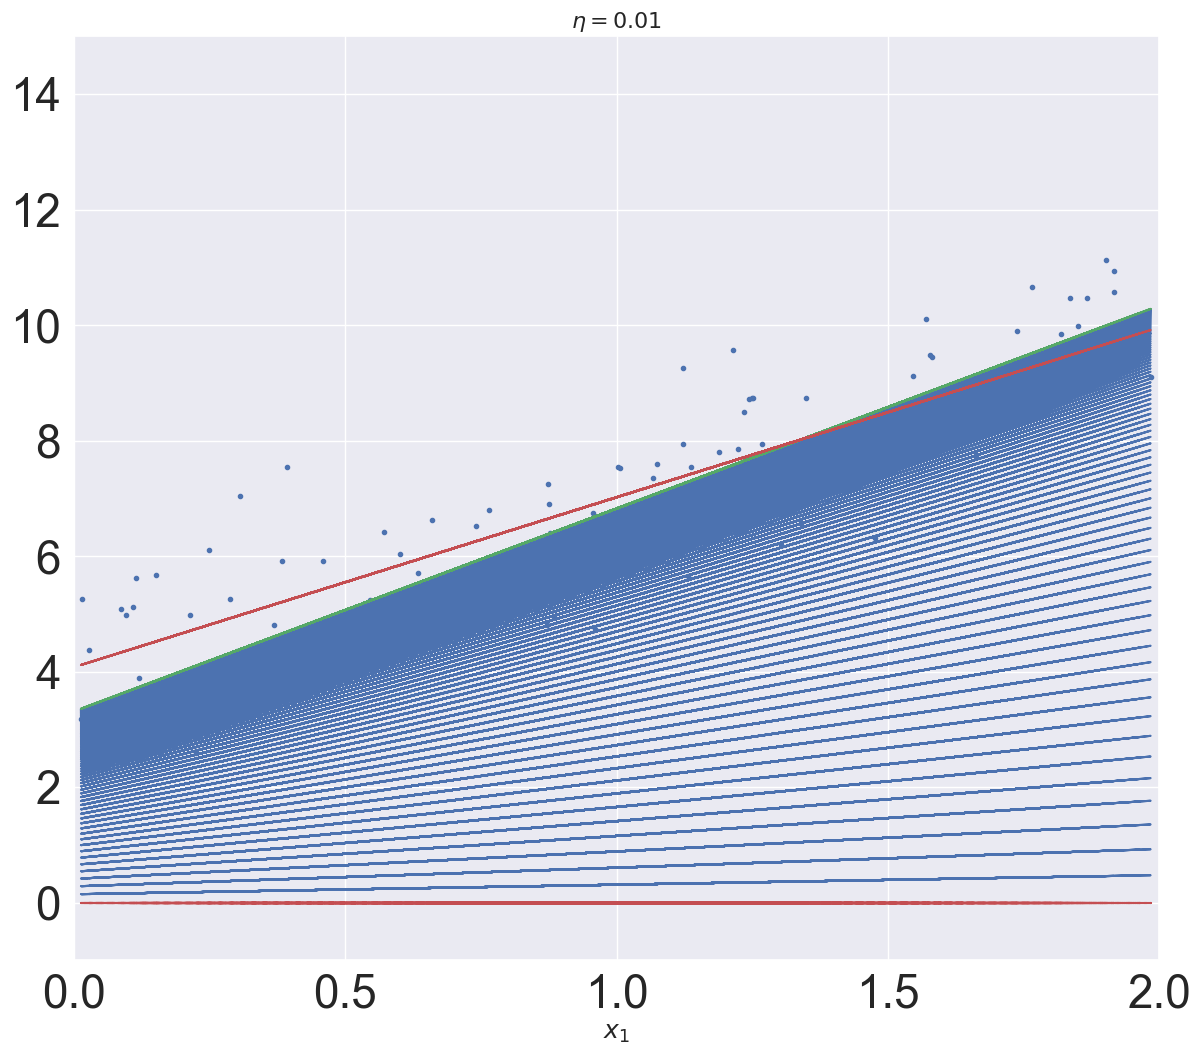

In [52]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = np.array([[0],
       [0]]), eta = 0.01, n_iterations = 100, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1)

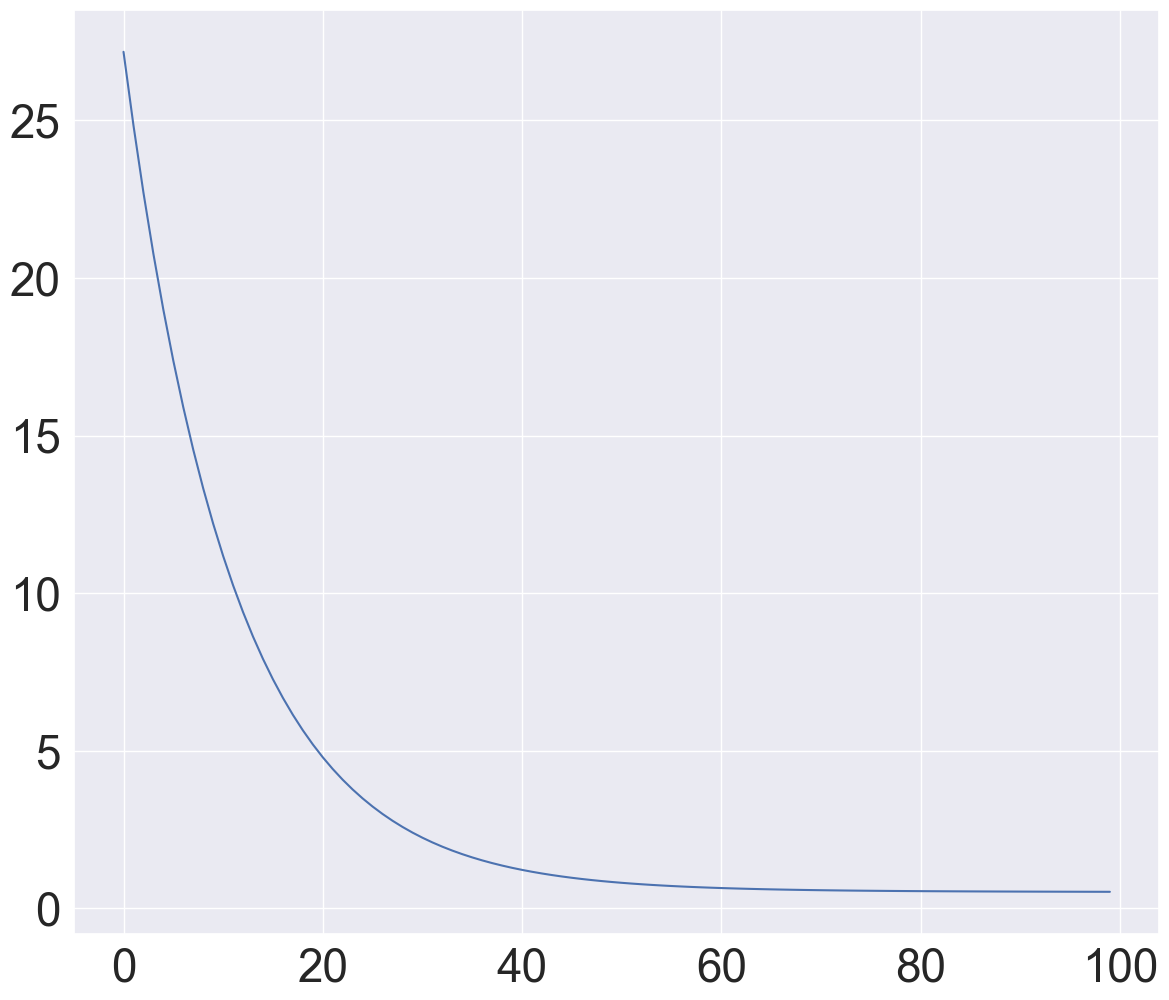

In [53]:
plt.figure(figsize=(14,12))
plt.plot(costList);

[[-14.2513053 ]
 [-16.57651051]]
[[-13.62257326]
 [-15.82314236]]
[[-13.0220366]
 [-15.1036201]]
[[-12.44842961]
 [-14.41642424]]
[[-11.90054343]
 [-13.76010347]]
[[-11.37722347]
 [-13.13327166]]
[[-10.87736697]
 [-12.53460491]]
[[-10.39992066]
 [-11.96283873]]
[[ -9.94387857]
 [-11.41676543]]
[[ -9.50827989]
 [-10.8952315 ]]
[[ -9.09220694]
 [-10.39713524]]
[[-8.69478323]
 [-9.92142441]]
[[-8.31517163]
 [-9.46709398]]
[[-7.95257258]
 [-9.03318408]]
[[-7.60622243]
 [-8.61877789]]
[[-7.27539179]
 [-8.22299978]]
[[-6.95938403]
 [-7.84501342]]
[[-6.65753379]
 [-7.48402001]]
[[-6.36920558]
 [-7.13925664]]
[[-6.09379243]
 [-6.80999462]]
[[-5.83071464]
 [-6.49553799]]
[[-5.57941851]
 [-6.19522204]]
[[-5.33937521]
 [-5.90841187]]
[[-5.11007964]
 [-5.63450112]]
[[-4.89104939]
 [-5.37291063]]
[[-4.6818237 ]
 [-5.12308725]]
[[-4.48196249]
 [-4.88450265]]
[[-4.29104544]
 [-4.65665222]]
[[-4.1086711 ]
 [-4.43905403]]
[[-3.93445604]
 [-4.23124774]]
[[-3.76803404]
 [-4.03279372]]
[[-3.60905534]
 [-3

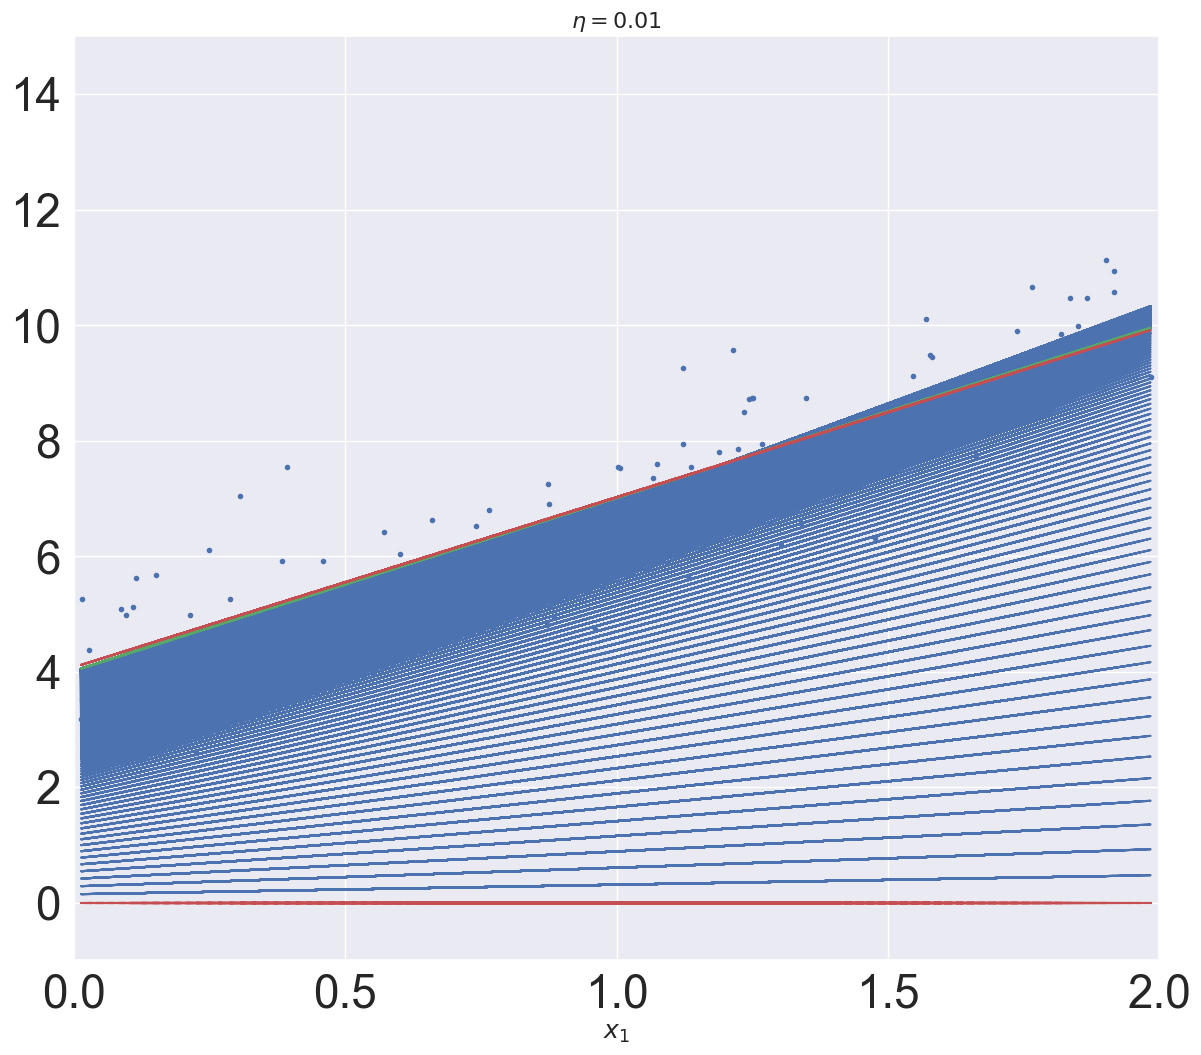

In [54]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = np.array([[0],
       [0]]), eta = 0.01, n_iterations = 1000, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1)

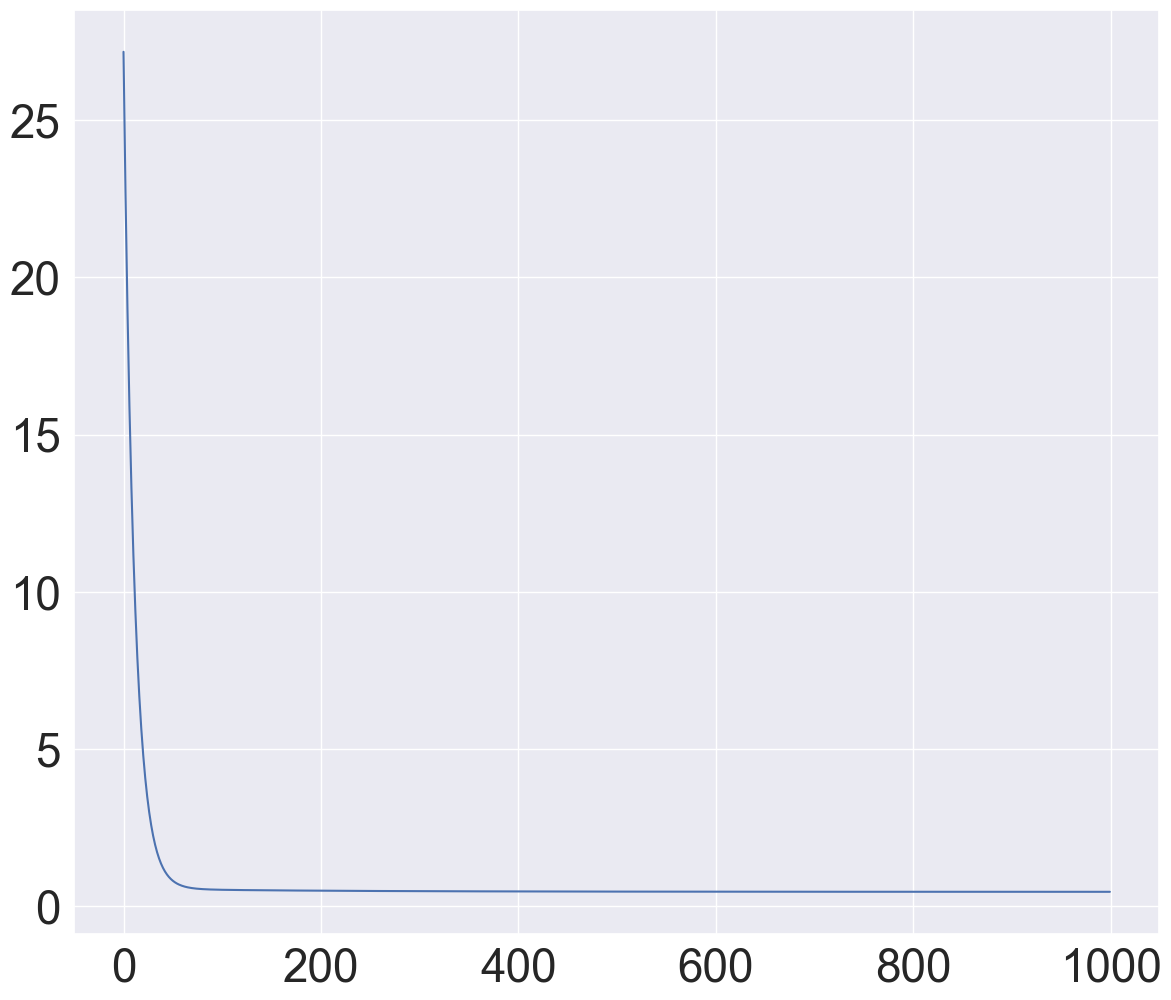

In [55]:
plt.figure(figsize=(14,12))
plt.plot(costList);